In [106]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"GPU: {device}")


GPU: cuda


In [162]:
import time

start_time_code = time.time()

## Import Library

In [181]:
# import stanza
# stanza.download('id')


In [182]:
import pandas as pd
import numpy as np
import nltk, re, string

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nlp_id.lemmatizer import Lemmatizer

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import joblib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('tokenize')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \asus.LAPTOP-P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package pu

True

In [183]:
data = pd.read_csv('1000 tweet.csv')

display(data)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.770000e+18,Wed Mar 13 05:08:08 +0000 2024,0,Prabowo-Gibran memimpin dengan perolehan suara...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,NaN,0,0,0,https://x.com/RElnanda10837/status/17677796549...,1.720000e+18,RElnanda10837
1,1.770000e+18,Wed Mar 13 05:07:49 +0000 2024,0,Prabowo-Gibran semakin kuat di puncak peroleha...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Kota Manado, Sulawesi Utara",0,0,0,https://x.com/tiaraacantikka/status/1767779575...,1.720000e+18,tiaraacantikka
2,1.770000e+18,Wed Mar 13 05:07:48 +0000 2024,0,Prabowo-Gibran unggul dengan perolehan suara y...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Setia Budi, Indonesia",0,0,0,https://x.com/zasiarenia/status/17677795719135...,1.710000e+18,zasiarenia
3,1.770000e+18,Wed Mar 13 05:07:27 +0000 2024,1,Prabowo-Gibran terus menunjukkan keunggulan da...,1.770000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17677...,NaN,in,"Tambora, Indonesia",0,0,0,https://x.com/Arunamatatas/status/176777948378...,1.700000e+18,Arunamatatas
4,1.770000e+18,Wed Mar 13 05:07:19 +0000 2024,0,Suara rakyat memberikan kepercayaan pada Prabo...,1.770000e+18,https://pbs.twimg.com/media/GIhqCOfaYAAWUrm.jpg,NaN,in,"Gambir, Indonesia",0,0,0,https://x.com/GitaCarmen35/status/176777944970...,1.700000e+18,GitaCarmen35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10091,1.770000e+18,Sun Mar 10 13:59:00 +0000 2024,0,@PartaiSocmed #pilpres2024,1.770000e+18,NaN,PartaiSocmed,qme,Indonesia.,0,0,0,https://x.com/ErickConstant14/status/176682608...,9.710000e+17,ErickConstant14
10092,1.770000e+18,Sun Mar 10 08:08:43 +0000 2024,12,#pinetwork #Pilpres2024 2023å¹´Googleå¹¿å‘Šå•†...,1.770000e+18,NaN,NaN,zh,"Wan Chai District, Hong Kong",1,6,2,https://x.com/allenwo18517182/status/176673793...,1.430000e+18,allenwo18517182
10093,1.770000e+18,Sun Mar 10 07:01:37 +0000 2024,0,muak gua sama pendukung anies semua di kaitkan...,1.770000e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/Kevinalharix/status/176672105280...,1.750000e+18,Kevinalharix
10094,1.770000e+18,Sat Mar 09 16:24:17 +0000 2024,0,Ayoo. Perbanyak toa pada bulan ramadhan. #mena...,1.770000e+18,NaN,NaN,in,indonesia,0,0,0,https://x.com/iwanlaskargayo/status/1766500264...,2.151783e+08,iwanlaskargayo


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10096 entries, 0 to 10095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      10096 non-null  float64
 1   created_at               10096 non-null  object 
 2   favorite_count           10096 non-null  int64  
 3   full_text                10093 non-null  object 
 4   id_str                   10096 non-null  float64
 5   image_url                3103 non-null   object 
 6   in_reply_to_screen_name  3441 non-null   object 
 7   lang                     10096 non-null  object 
 8   location                 6185 non-null   object 
 9   quote_count              10096 non-null  int64  
 10  reply_count              10096 non-null  int64  
 11  retweet_count            10096 non-null  int64  
 12  tweet_url                10096 non-null  object 
 13  user_id_str              10096 non-null  float64
 14  username              

In [185]:
data.shape

(10096, 15)

In [186]:
data.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     3
id_str                        0
image_url                  6993
in_reply_to_screen_name    6655
lang                          0
location                   3911
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [187]:
data.duplicated().sum()

341

## Data Cleansing

In [188]:
data = data.drop_duplicates()

In [189]:
data = data[data['lang'] == 'in']

In [190]:
data['full_text'] = data['full_text'].str.lower()

In [191]:
data = data[['created_at', 'username', 'full_text']]

In [192]:
def remove_tweet_special(text):
    # Menghapus tab, baris baru, dan back slice
    text = text.replace('\\t', ' ').replace('\\n', ' ').\
        replace('\\u', ' ').replace('\\', '')

    # Menghapus karakter non-ASCII (emotikon, huruf Cina, dll.)
    text = ''.join(char for char in text if ord(char) < 128)

    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", \
                           text).split())

    # Menghapus URL yang tidak lengkap
    text = text.replace("http://", " ").replace("https://", " ")

    return text

def clean_text(data):
    # Menghapus karakter yang tidak diinginkan (_) dan karakter selain huruf
    data['full_text'] = data['full_text'].str.\
        replace(r"[^a-zA-Z ]+", " ").str.strip()

    # Mengganti multiple whitespace dengan single whitespace
    data['full_text'] = data['full_text'].\
        replace(" +", " ", regex=True)

    return data

def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

data['clean_text'] = data['full_text'].apply(remove_tweet_special)
data['clean_text'] = data['clean_text'].apply(remove_numbers)
data['clean_text'] = data['clean_text'].apply(clean_punctuation)
data = clean_text(data)


<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\asus.LAPTOP-P9TBK6TS.000\AppData\Local\Temp\ipykernel_7896\3510339158.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", \


In [193]:
data.head()

,created_at,username,full_text,clean_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...


In [194]:
all_tweets = ' '.join(data['clean_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
prabowogibran memimpin dengan perolehan suara yang mengesankan menandakan dukungan yang kuat dari rakyat inihasil dipilihrakyat prabowogibran semakin kuat di puncak perolehan suara inihasil dipilihrak

Total jumlah karakter: 1360632
Jumlah kata unik: 18149


## Data Pre-Processing

In [195]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

data['tokenized_text'] = tokenized(data['clean_text'])
data.head()

,created_at,username,full_text,clean_text,tokenized_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,..."


In [196]:
import requests
from io import StringIO

# Mengambil data
response = requests.get('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

# Menyimpan data dalam format teks
data_req_slang = response.content.decode('utf-8')

# Membaca data dengan pandas

data_slang = pd.read_csv(StringIO(data_req_slang), header=None,\
                          names=['slang', 'formal','In-dictionary',	'context',	'category1',	'category2',	'category3'
])

# Menampilkan data
data_slang.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,slang,formal,In-dictionary,context,category1,category2,category3
1,woww,wow,1,wow,elongasi,0,0
2,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
3,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
4,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0


In [197]:
lemmatizer = Lemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Misalkan data adalah DataFrame yang sudah ada
data['lemmatize_text'] = data['tokenized_text'].apply(lemmatize_text)

# Jika ingin menggabungkan kembali hasil lemmatization menjadi string
# data['lemmatize_text'] = data['lemmatize_text'].apply(lambda x: ' '.join(x))

# Menampilkan hasil
# print(data[['tokenized_text', 'lemmatize_text']].head())

data.head()

,created_at,username,full_text,clean_text,tokenized_text,lemmatize_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi..."


In [198]:
import ast

def replace_slang(text_list):
    # Pastikan input adalah list
    if isinstance(text_list, str):
        try:
            text_list = ast.literal_eval(text_list)
        except:
            return text_list  # Kembalikan teks asli jika gagal mengonversi

    # Proses setiap kata dalam list
    for i in range(len(text_list)):
        slang_word = data_slang[data_slang['slang'] == text_list[i]]
        if not slang_word.empty:
            text_list[i] = slang_word['formal'].values[0]
    
    return text_list

# Terapkan fungsi ke kolom lemmatized_text
data['unslang_text'] = data['lemmatize_text'].apply(replace_slang)

In [199]:
data.head()

,created_at,username,full_text,clean_text,tokenized_text,lemmatize_text,unslang_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi..."


In [200]:
def remove_stopwords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

data['freestop_text']=remove_stopwords(data['unslang_text'])

In [201]:
data.head()

,created_at,username,full_text,clean_text,tokenized_text,lemmatize_text,unslang_text,freestop_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d..."
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,..."
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi..."
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil..."
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,..."


In [202]:
data.dropna(inplace=True)

In [203]:
data['tweet_text'] = data['freestop_text'].apply(lambda x: ' '.join(x))
data.head()

,created_at,username,full_text,clean_text,tokenized_text,lemmatize_text,unslang_text,freestop_text,tweet_text
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d...",prabowogibran pimpin suara kesan tanda dukung ...
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,...",prabowogibran kuat puncak suara inihasil dipil...
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi...",prabowogibran unggul suara gempar inihasil dip...
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil...",prabowogibran unggul suara inihasil dipilihrakyat
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,...",suara rakyat percaya prabowogibran suara kesan...


## Labelling Data

### IndoBERT Classification

In [ ]:
# from transformers import pipeline

# start_time_class = time.time()

# pretrained = "mdhugol/indonesia-bert-sentiment-classification"
# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)
# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# # Mapping label
# label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}


# # Fungsi untuk menganalisis sentimen
# def analyze_sentiment(text):
#     result = sentiment_analysis(text)[0]
#     label = label_index.get(result['label'], 'unknown')
#     score = result['score']
#     return label, score

# # Terapkan fungsi ke DataFrame dan tambahkan kolom baru
# data[['indoBert Classification', 'indoBERT Classification score']] = data['full_text'].apply(analyze_sentiment).apply(pd.Series)

# # Tampilkan DataFrame dengan kolom baru
# data.head()

# end_time = time.time()

# execution_time = end_time - start_time_class
# print(f"Waktu eksekusi: {execution_time} detik")

In [204]:
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import time
import pandas as pd

# Periksa ketersediaan CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Fungsi untuk memeriksa penggunaan memori GPU
def print_gpu_memory():
    if torch.cuda.is_available():
        print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1e9:.2f} GB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved()/1e9:.2f} GB")

start_time_class = time.time()

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Explicitly set the device when creating the pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Verifikasi lokasi model
print(f"Model is on: {next(model.parameters()).device}")

# Verifikasi pipeline menggunakan GPU
print(f"Pipeline is using: {'GPU' if sentiment_analysis.device.type == 'cuda' else 'CPU'}")

# Mapping label
label_index = {'LABEL_0': 'positif', 'LABEL_1': 'netral', 'LABEL_2': 'negatif'}

# Fungsi untuk menganalisis sentimen
def analyze_sentiment(text):
    result = sentiment_analysis(text)[0]
    label = label_index.get(result['label'], 'unknown')
    score = result['score']
    return label, score

# Terapkan fungsi ke DataFrame dan tambahkan kolom baru
data[['indoBert Classification', 'indoBERT Classification score']] = data['tweet_text'].apply(analyze_sentiment).apply(pd.Series)

# Tampilkan DataFrame dengan kolom baru
print(data.head())

end_time = time.time()

execution_time = end_time - start_time_class
print(f"Waktu eksekusi: {execution_time} detik")

# Periksa penggunaan memori GPU setelah eksekusi
print_gpu_memory()

# Bersihkan cache CUDA jika diperlukan
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA cache telah dibersihkan.")

Using device: cuda


c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model is on: cuda:0
Pipeline is using: GPU
                       created_at        username  \
0  Wed Mar 13 05:08:08 +0000 2024   RElnanda10837   
1  Wed Mar 13 05:07:49 +0000 2024  tiaraacantikka   
2  Wed Mar 13 05:07:48 +0000 2024      zasiarenia   
3  Wed Mar 13 05:07:27 +0000 2024    Arunamatatas   
4  Wed Mar 13 05:07:19 +0000 2024    GitaCarmen35   

                                           full_text  \
0  prabowo-gibran memimpin dengan perolehan suara...   
1  prabowo-gibran semakin kuat di puncak peroleha...   
2  prabowo-gibran unggul dengan perolehan suara y...   
3  prabowo-gibran terus menunjukkan keunggulan da...   
4  suara rakyat memberikan kepercayaan pada prabo...   

                                          clean_text  \
0  prabowogibran memimpin dengan perolehan suara ...   
1  prabowogibran semakin kuat di puncak perolehan...   
2  prabowogibran unggul dengan perolehan suara ya...   
3  prabowogibran terus menunjukkan keunggulan dal...   
4  suara rakyat membe

In [205]:
data.head()

,created_at,username,full_text,clean_text,tokenized_text,lemmatize_text,unslang_text,freestop_text,tweet_text,indoBert Classification,indoBERT Classification score
0,Wed Mar 13 05:08:08 +0000 2024,RElnanda10837,prabowo-gibran memimpin dengan perolehan suara...,prabowogibran memimpin dengan perolehan suara ...,"[prabowogibran, memimpin, dengan, perolehan, s...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, dengan, oleh, suara, y...","[prabowogibran, pimpin, suara, kesan, tanda, d...",prabowogibran pimpin suara kesan tanda dukung ...,positif,0.558523
1,Wed Mar 13 05:07:49 +0000 2024,tiaraacantikka,prabowo-gibran semakin kuat di puncak peroleha...,prabowogibran semakin kuat di puncak perolehan...,"[prabowogibran, semakin, kuat, di, puncak, per...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, makin, kuat, di, puncak, oleh,...","[prabowogibran, kuat, puncak, suara, inihasil,...",prabowogibran kuat puncak suara inihasil dipil...,positif,0.798093
2,Wed Mar 13 05:07:48 +0000 2024,zasiarenia,prabowo-gibran unggul dengan perolehan suara y...,prabowogibran unggul dengan perolehan suara ya...,"[prabowogibran, unggul, dengan, perolehan, sua...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, dengan, oleh, suara, y...","[prabowogibran, unggul, suara, gempar, inihasi...",prabowogibran unggul suara gempar inihasil dip...,netral,0.926968
3,Wed Mar 13 05:07:27 +0000 2024,Arunamatatas,prabowo-gibran terus menunjukkan keunggulan da...,prabowogibran terus menunjukkan keunggulan dal...,"[prabowogibran, terus, menunjukkan, keunggulan...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, terus, tunjuk, unggul, dalam, ...","[prabowogibran, unggul, suara, inihasil, dipil...",prabowogibran unggul suara inihasil dipilihrakyat,netral,0.699285
4,Wed Mar 13 05:07:19 +0000 2024,GitaCarmen35,suara rakyat memberikan kepercayaan pada prabo...,suara rakyat memberikan kepercayaan pada prabo...,"[suara, rakyat, memberikan, kepercayaan, pada,...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, beri, percaya, pada, prabowogi...","[suara, rakyat, percaya, prabowogibran, suara,...",suara rakyat percaya prabowogibran suara kesan...,netral,0.528113


In [206]:
data.to_csv('experiment.csv', index=False)

## Visualisasi Data

In [210]:
all_tweets_clean = ' '.join(data['tweet_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets_clean[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets_clean)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets_clean.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
prabowogibran pimpin suara kesan tanda dukung kuat rakyat inihasil dipilihrakyat prabowogibran kuat puncak suara inihasil dipilihrakyat prabowogibran unggul suara gempar inihasil dipilihrakyat prabowo

Total jumlah karakter: 832733
Jumlah kata unik: 12802


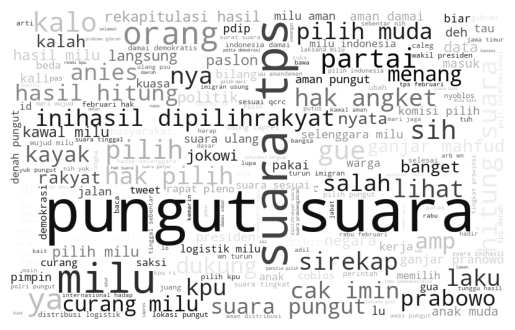

In [211]:
wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(all_tweets_clean)
plt.axis("off")
plt.imshow(wc)

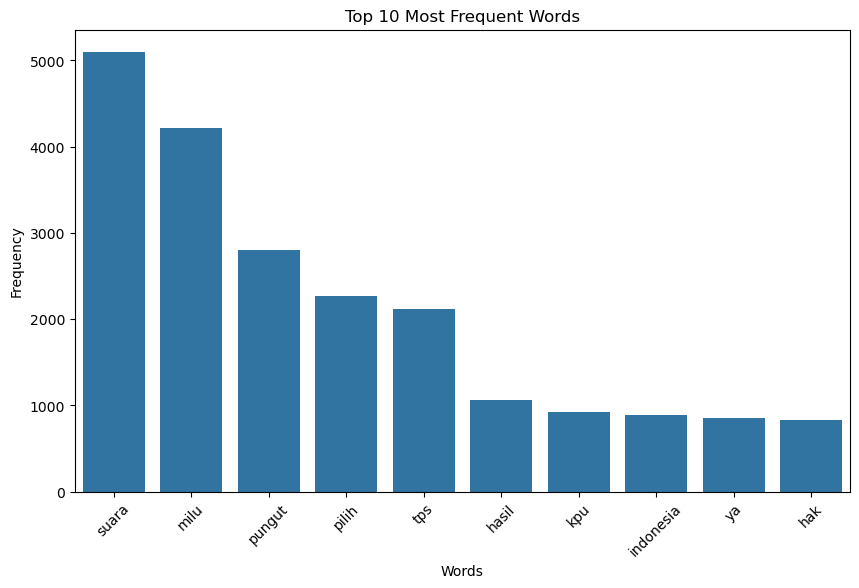

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Hapus tanda baca dan ubah menjadi huruf kecil
clean_text = re.sub(r'[^\w\s]', '', all_tweets_clean.lower())

# Pecah teks menjadi daftar kata-kata
words = clean_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata terbanyak
top_10_words = word_counts.most_common(10)

# Konversi ke DataFrame untuk digunakan di seaborn
df_top_10 = pd.DataFrame(top_10_words, columns=['word', 'count'])

# Plot barchart menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_top_10)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Memutar label kata agar lebih mudah dibaca
plt.show()


In [213]:
data['indoBert Classification'].value_counts()

indoBert Classification
netral     4967
negatif    3506
positif     774
Name: count, dtype: int64

## Modelling

In [214]:
X = data['full_text']
y = data['indoBert Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

models = {
    'Naive Bayes': naive_bayes.MultinomialNB(),
    'SVM': SVC(probability=True)
}

param_grids = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(X_test_Tfidf)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.7755
              precision    recall  f1-score   support

     negatif       0.71      0.89      0.79      1044
      netral       0.92      0.74      0.82      1493
     positif       0.47      0.53      0.50       238

    accuracy                           0.78      2775
   macro avg       0.70      0.72      0.70      2775
weighted avg       0.80      0.78      0.78      2775


SVM Accuracy: 0.8202
              precision    recall  f1-score   support

     negatif       0.74      0.88      0.80      1044
      netral       0.89      0.85      0.87      1493
     positif       0.81      0.36      0.50       238

    accuracy                           0.82      2775
   macro avg       0.81      0.70      0.72      2775
weighted avg       0.83      0.82      0.81      2775



In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

# Asumsikan data sudah dimuat ke variabel 'data'
X = data['full_text']
y = data['indoBert Classification']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization dengan jumlah fitur yang lebih sedikit
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

# SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

# Definisikan model dan parameter
models = {
    'Naive Bayes': (MultinomialNB(), {'alpha': uniform(0.1, 1.0)}),
    'SVM': (LinearSVC(dual=False), {'C': uniform(0.1, 10), 'max_iter': randint(1000, 2000)})
}

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(name, model, param_distributions):
    print(f"\nTraining {name}...")
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train_resampled, y_train_resampled)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_Tfidf)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    return best_model

# Latih dan evaluasi setiap model
best_models = {}
for name, (model, param_dist) in models.items():
    best_models[name] = train_and_evaluate(name, model, param_dist)

print("Training and evaluation completed.")


Training Naive Bayes...
Naive Bayes Accuracy: 0.7686
              precision    recall  f1-score   support

     negatif       0.71      0.88      0.79      1044
      netral       0.92      0.73      0.81      1493
     positif       0.43      0.53      0.48       238

    accuracy                           0.77      2775
   macro avg       0.69      0.71      0.69      2775
weighted avg       0.80      0.77      0.77      2775


Training SVM...
SVM Accuracy: 0.7914
              precision    recall  f1-score   support

     negatif       0.77      0.77      0.77      1044
      netral       0.86      0.84      0.85      1493
     positif       0.52      0.55      0.53       238

    accuracy                           0.79      2775
   macro avg       0.71      0.72      0.72      2775
weighted avg       0.79      0.79      0.79      2775

Training and evaluation completed.


In [216]:
# Definisikan model
model = best_models['Naive Bayes']

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")


Fold 1:
Fold 1: 0.8303
Accuracy: 0.8313
              precision    recall  f1-score   support

     negatif       0.74      0.90      0.81       344
      netral       0.88      0.75      0.81       337
     positif       0.90      0.84      0.87       362

    accuracy                           0.83      1043
   macro avg       0.84      0.83      0.83      1043
weighted avg       0.84      0.83      0.83      1043

Fold 2:
Fold 2: 0.8437
Accuracy: 0.8332
              precision    recall  f1-score   support

     negatif       0.74      0.92      0.82       359
      netral       0.94      0.71      0.81       353
     positif       0.88      0.87      0.88       331

    accuracy                           0.83      1043
   macro avg       0.85      0.83      0.83      1043
weighted avg       0.85      0.83      0.83      1043

Fold 3:
Fold 3: 0.8349
Accuracy: 0.8397
              precision    recall  f1-score   support

     negatif       0.77      0.90      0.83       373
      net

In [96]:
# Definisikan model
model = best_models['SVM']

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")


Fold 1:
Fold 1: 0.8257
Accuracy: 0.8627
              precision    recall  f1-score   support

     negatif       0.88      0.79      0.83       319
      netral       0.86      0.83      0.85       289
     positif       0.85      0.96      0.90       310

    accuracy                           0.86       918
   macro avg       0.86      0.86      0.86       918
weighted avg       0.86      0.86      0.86       918

Fold 2:
Fold 2: 0.8257
Accuracy: 0.8464
              precision    recall  f1-score   support

     negatif       0.85      0.76      0.80       309
      netral       0.88      0.82      0.85       314
     positif       0.82      0.96      0.88       295

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.84       918

Fold 3:
Fold 3: 0.8388
Accuracy: 0.8486
              precision    recall  f1-score   support

     negatif       0.87      0.78      0.82       317
      net

In [100]:
joblib.dump(best_models['Naive Bayes'], 'naive_bayes.joblib')
joblib.dump(best_models['SVM'], 'SVM.joblib')

['SVM.joblib']

In [77]:
data['indoBert Classification'].value_counts()

indoBert Classification
netral     4374
negatif    3552
positif    1321
Name: count, dtype: int64

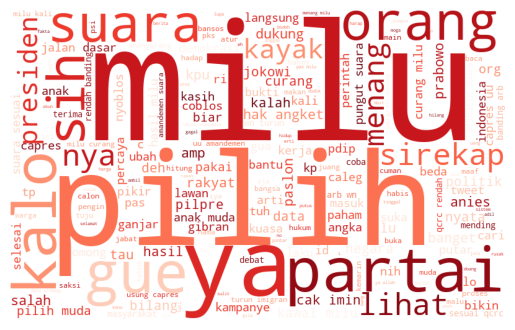

In [114]:
negative_tweets = data[data['indoBert Classification'] == 'negatif']['full_text']

# Gabungkan semua tweet negatif menjadi satu teks
all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

# Buat WordCloud untuk kata-kata dari tweet dengan sentimen negatif
wc = WordCloud(background_color='white', colormap='Reds',
               stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)

# Tampilkan WordCloud
plt.axis("off")
plt.imshow(wc)
plt.show()


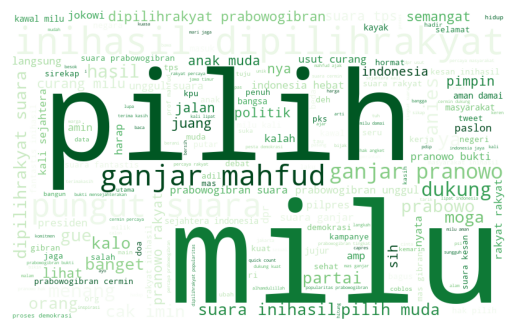

In [113]:
negative_tweets = data[data['indoBert Classification'] == 'positif']['full_text']

all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

wc = WordCloud(background_color='white', colormap='Greens',
               stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)

plt.axis("off")
plt.imshow(wc)
plt.show()


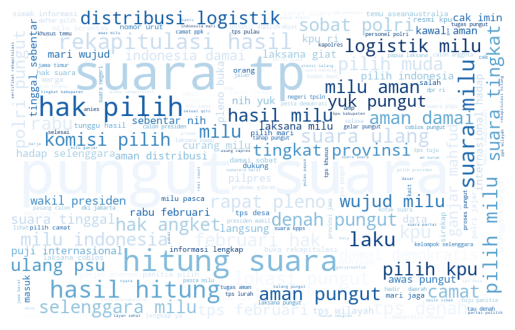

In [110]:
if data['indoBert Classification'].str.contains('netral').any():
    negative_tweets = data[data['indoBert Classification'] == 'netral']['full_text']

    all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

    wc = WordCloud(background_color='white', colormap='Blues',
                  stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

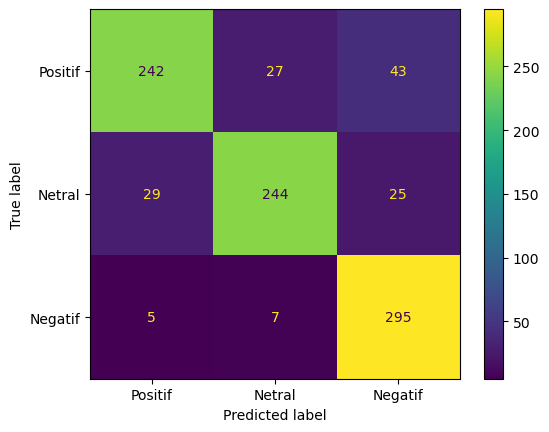

In [81]:
cm = confusion_matrix(y_test_fold, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()

plt.grid(False)
plt.show()

In [82]:
data.to_csv('sentiment svm.csv', index=False)

In [83]:
end_time_code = time.time()

execution_time = end_time_code - start_time_code
print(f"Waktu eksekusi: {execution_time} detik")

Waktu eksekusi: 440.5575051307678 detik
